In [192]:
import pandas as pd
import seaborn as sns
import numpy as np

In [193]:
fn = "data_1.csv"
df = pd.read_csv(fn, delimiter=";")
df.columns = df.columns.str.lower().str.replace(' ', '_')

Способ охлаждения:

	- Кондиционирование = может быть разных типов, окна закрыты.


In [194]:
df.loc[df["способ_охлаждения"] == "Кондиционирование", "окно"].unique()

array([nan,  0.])

Так как окна обязательно закрыты, заменяем пропуски на 0

In [195]:
# 1
df.loc[df["способ_охлаждения"] == "Кондиционирование", "окно"] = 0

Способ охлаждения:

	- NA = не применимо, например исследование холодной зимой, когда включено отопление.


Nan здесь нет

In [196]:
df.loc[df["способ_охлаждения"].isna(), "время_года"]

,время_года


Способ охлаждения:

	- Кондиционирование = может быть разных типов, окна закрыты.

In [197]:
mask = (df["способ_охлаждения"] == "Смешанный") & (df["режим_при_смешанном_типе_охлаждения"] == "Кондиционирование")
df.loc[mask, "окно"].unique()

array([nan,  1.,  0.])

Кто-то открыл окна! Ай-яй-яй

In [198]:
df.loc[mask & (df["окно"] == 1)]

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,...,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
74,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Мужской,...,0.14,NaN,NaN,NaN,NaN,1.0,NaN,NaN,22.0,0
76,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,35.0,Мужской,...,0.12,NaN,NaN,NaN,NaN,1.0,1.0,NaN,22.0,0
81,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Женский,...,0.08,NaN,NaN,NaN,NaN,1.0,NaN,NaN,220.0,0
85,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,45.0,Мужской,...,0.08,NaN,NaN,NaN,NaN,1.0,NaN,NaN,22.0,0
92,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Женский,...,0.12,NaN,NaN,NaN,NaN,1.0,NaN,NaN,22.0,0
111,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Мужской,...,0.11,NaN,NaN,NaN,NaN,1.0,0.0,NaN,22.0,0
113,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,45.0,Женский,...,0.13,NaN,NaN,NaN,NaN,1.0,1.0,NaN,22.0,0
116,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,35.0,Мужской,...,0.04,NaN,NaN,NaN,NaN,1.0,NaN,NaN,22.0,0
121,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Мужской,...,0.16,NaN,NaN,NaN,NaN,1.0,NaN,NaN,22.0,0
122,2010.0,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,45.0,Мужской,...,0.10,NaN,NaN,NaN,NaN,1.0,NaN,NaN,22.0,0


13% товарищей не по назначению использовали оборудование

In [199]:
ans = len(df.loc[mask & (df["окно"] == 1)]) / len(df[mask])
np.round(ans, 2)

np.float64(0.13)

Проверим их отзывы

In [200]:
df["оценка_комфорта"] = df["оценка_комфорта"].fillna(0)
df["оценка_комфорта"] = np.round(df["оценка_комфорта"], 0).astype(np.int64)
df.loc[mask & (df["окно"] == 1), "оценка_комфорта"].describe()

,оценка_комфорта
count,30.000000
mean,0.433333
std,1.250747
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


<Axes: xlabel='оценка_комфорта', ylabel='Count'>

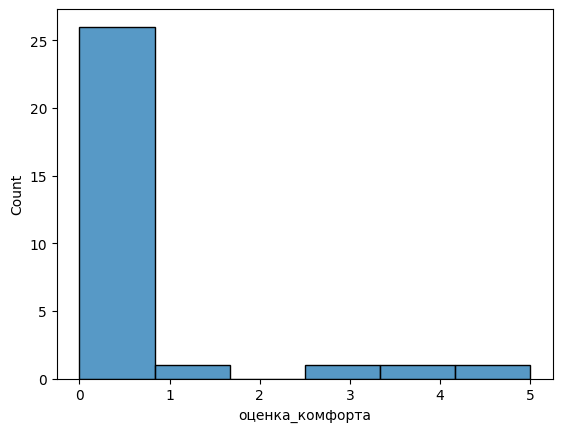

In [201]:
sns.histplot(df.loc[mask & (df["окно"] == 1), "оценка_комфорта"])

Получается они проставили мало оценок, да и учитывая ситуацию неясно принимать во внимание их мнение или нет

In [204]:
#2
df.loc[mask, "окно"] = df.loc[mask, "окно"].fillna(0)

In [203]:
df.loc[(df["способ_охлаждения"] == "Смешанный") & (df["режим_при_смешанном_типе_охлаждения"] == "Вентиляция"), "окно"].value_counts()

,count
окно,
0.0,46
1.0,29
